In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Example path - update this with your own
file_path = '/content/drive/My Drive/MY-PROJECT/Global Startup Eco sys DB with Funding & Growth Analysis/investments_VC.csv'

# Load the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning & Initial Exploration

Quick Overview of Dataset

In [5]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

# Check unique values per column
df.nunique().sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,0
status,3
round_H,5
funding_rounds,17
secondary_market,20
round_G,32
post_ipo_debt,57
state_code,61
founded_year,103
round_F,110
country_code,115


In [6]:
#Remove Whitespace from Column Names because some column names have extra spaces
df.columns = df.columns.str.strip()


In [7]:
#Drop Un-used columns
df.drop(columns=['permalink', 'homepage_url', 'region', 'state_code'], inplace=True)


In [8]:
# Funding_total_usd : Replace '-' with NaN and convert to float
# It contain values the Indian-style comma formatting (like ' 17,50,000 '), which pandas can't convert directly to float.
# Remove commas and whitespace, replace '-' with NaN
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '', regex=False).str.strip()
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan)

# Convert to float
df['funding_total_usd'] = df['funding_total_usd'].astype(float)


In [9]:
#Convert founded_at, first_funding_at, last_funding_at to datetime.
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [10]:
df.isnull().sum().sort_values(ascending=False).head(15)


,0
founded_year,15812
founded_quarter,15812
founded_month,15812
founded_at,15741
funding_total_usd,13387
city,10972
country_code,10129
market,8824
category_list,8817
status,6170


In [11]:
#I want to keep rows with essential info for analysis and ML.But some of those have lots of nulls, so instead keep rows with at least 70% non-null data

In [12]:
key_cols = ['name', 'funding_total_usd', 'country_code', 'market', 'funded_at']
df_clean = df[df.isnull().mean(axis=1) < 0.3]
df_clean.shape



(49437, 35)

# EDA

In [13]:
#Basic Summary Statistics
df_clean.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
name,49436,49349,Spire,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_list,45477,16675,|Software|,3650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,45470,753,Software,4620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_total_usd,40907.0,NaN,NaN,NaN,15912526.050407,1.0,350000.0,2000000.0,10000000.0,30079503000.0,168678800.166967
status,48123,3,operating,41828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,44165,115,USA,28793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,43322,4188,San Francisco,2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_rounds,49437.0,NaN,NaN,NaN,1.696219,1.0,1.0,1.0,2.0,18.0,1.294222
founded_at,38553,NaN,NaN,NaN,2007-04-24 13:20:39.592249600,1785-01-01 00:00:00,2005-11-29 00:00:00,2010-01-01 00:00:00,2012-01-01 00:00:00,2014-12-13 00:00:00,NaN
founded_month,38482,420,2012-01,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
from google.colab import files

# Save the DataFrame to a CSV file
df_clean.to_csv('cleaned_data.csv', index=False)

# Download the file
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:

# Step 3: Define your file path in Drive

# Step 4: Read CSV
df_clean = pd.read_csv('cleaned_data.csv')

# Step 5: Convert to Excel (.xlsx)
excel_path = '/content/converted_file.xlsx'
df_clean.to_excel(excel_path, index=False)

# Step 6: Download the Excel file

files.download(excel_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Replace with your actual Drive folder path
folder_path = '/content/drive/My Drive/MY-PROJECT/Global Startup Eco sys DB with Funding & Growth Analysis/'


In [43]:
import pandas as pd

# Save as CSV
csv_path = folder_path + 'cleaned_data.csv'
df_clean.to_csv(csv_path, index=False)

# Save as Excel
excel_path = folder_path + 'converted_file.xlsx'
df_clean.to_excel(excel_path, index=False)

print("Files saved to Google Drive!")


Files saved to Google Drive!


## Visualization

1. Top 10 Countries by Number of Startups

<ipython-input-14-28186c44bab7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


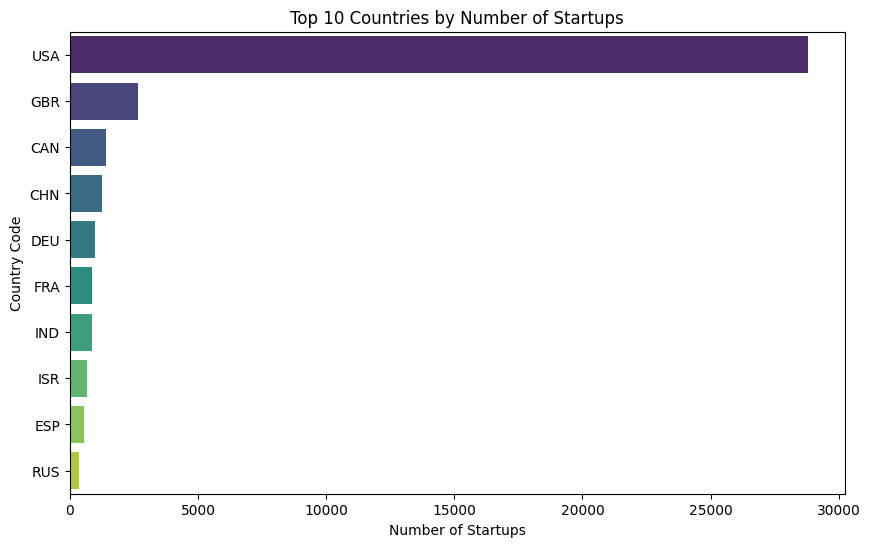

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = df_clean['country_code'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Startups")
plt.xlabel("Number of Startups")
plt.ylabel("Country Code")
plt.show()


2. Top 10 Markets/Industries

<ipython-input-15-f6d67156d273>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_markets.values, y=top_markets.index, palette='coolwarm')


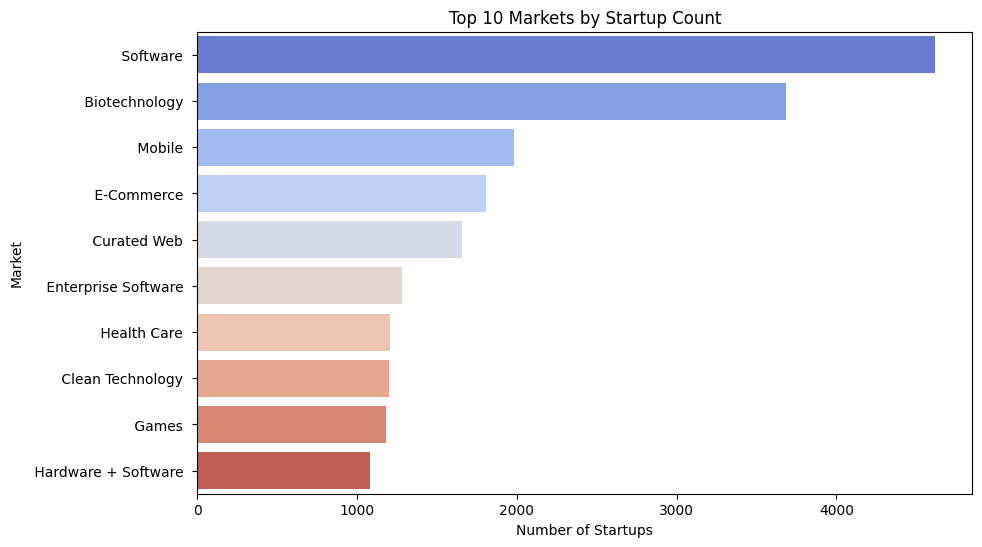

In [15]:
top_markets = df_clean['market'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_markets.values, y=top_markets.index, palette='coolwarm')
plt.title("Top 10 Markets by Startup Count")
plt.xlabel("Number of Startups")
plt.ylabel("Market")
plt.show()


3. Funding Distribution by Type

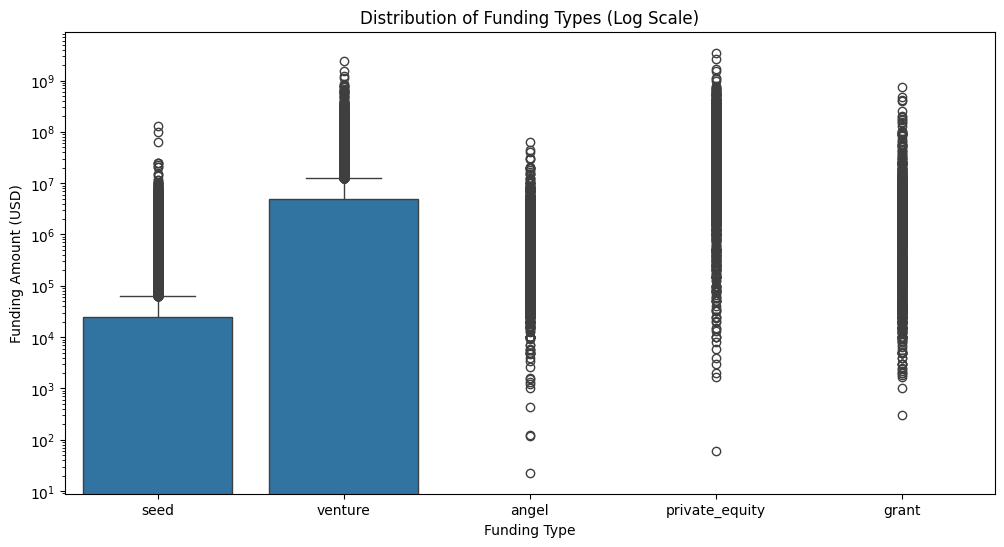

In [16]:
#BoxPlot
funding_cols = ['seed', 'venture', 'angel', 'private_equity', 'grant']
df_melted = df_clean.melt(value_vars=funding_cols)

plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.yscale('log')
plt.title("Distribution of Funding Types (Log Scale)")
plt.xlabel("Funding Type")
plt.ylabel("Funding Amount (USD)")
plt.show()


4. Number of Startups Founded Per Year

<ipython-input-17-581f0474e00b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['founded_year'] = df_clean['founded_year'].astype('Int64')


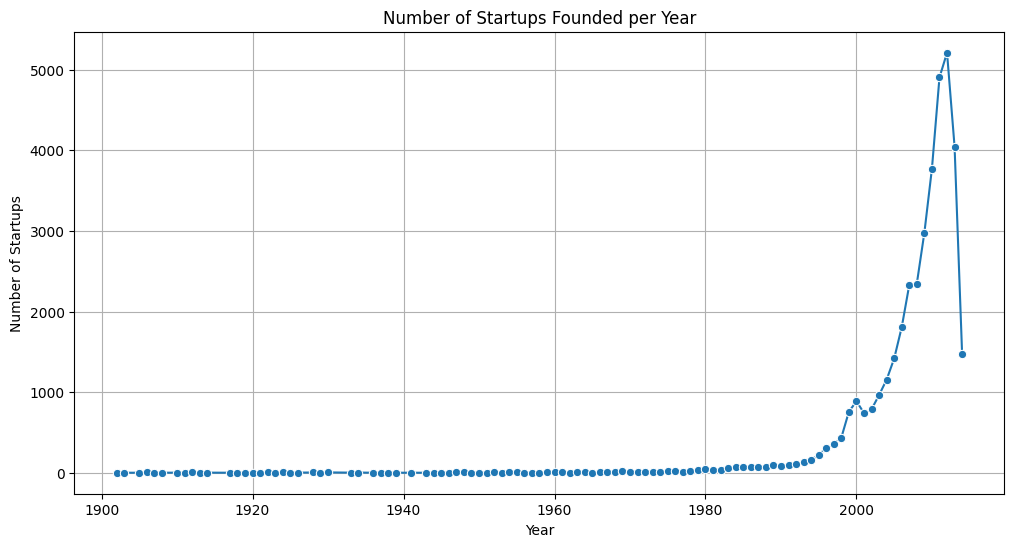

In [17]:
plt.figure(figsize=(12,6))
df_clean['founded_year'] = df_clean['founded_year'].astype('Int64')
year_counts = df_clean['founded_year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Startups Founded per Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.grid(True)
plt.show()


5. Total Funding Raised per Year

<ipython-input-18-35de9577f6c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['founded_year'] = df_clean['founded_year'].astype('Int64')


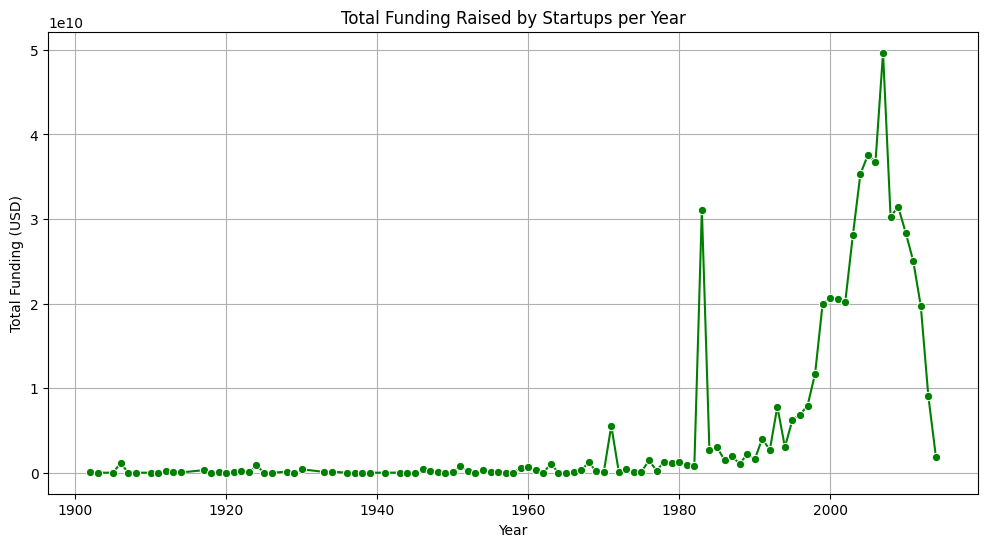

In [18]:
df_clean['founded_year'] = df_clean['founded_year'].astype('Int64')
funding_by_year = df_clean.groupby('founded_year')['funding_total_usd'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, color='green', marker='o')
plt.title('Total Funding Raised by Startups per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()


6.  Relationship Between Funding Rounds and Total Funding

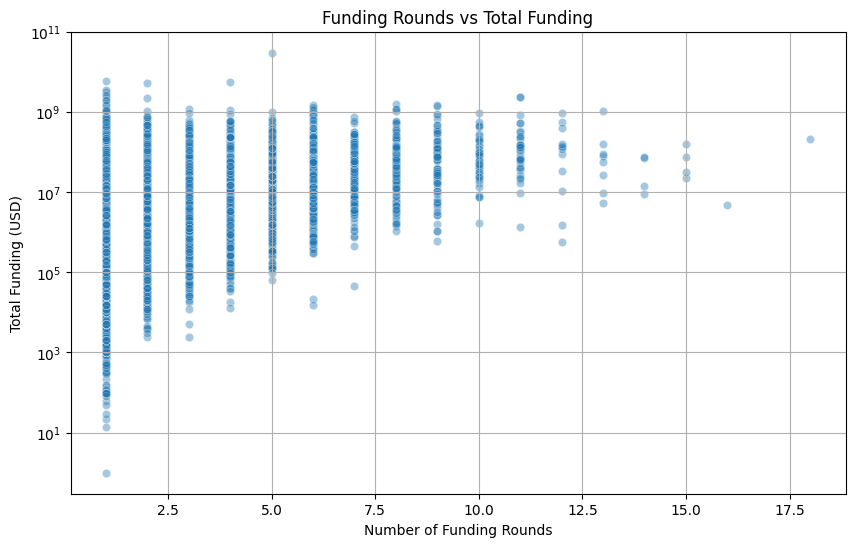

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='funding_rounds', y='funding_total_usd', alpha=0.4)
plt.title('Funding Rounds vs Total Funding')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Total Funding (USD)')
plt.yscale('log')
plt.grid(True)
plt.show()


# ML Modeling

Prepare Data for ML

In [20]:
#Create Binary Target Column
df_ml = df_clean.copy()
df_ml['funding_total_usd'] = df_ml['funding_total_usd'].astype(float)
df_ml['high_funding'] = (df_ml['funding_total_usd'] > 1_000_000).astype(int)


In [21]:
#Select Features
features = ['funding_rounds', 'seed', 'venture', 'angel', 'private_equity', 'grant', 'country_code', 'market']
df_ml = df_ml[features + ['high_funding']].dropna()

In [22]:
#Encode Categorical Features
df_ml = pd.get_dummies(df_ml, columns=['country_code', 'market'], drop_first=True)


In [23]:
#Split Data
from sklearn.model_selection import train_test_split

X = df_ml.drop('high_funding', axis=1)
y = df_ml['high_funding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9578998306315025

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      3833
           1       0.97      0.95      0.96      4433

    accuracy                           0.96      8266
   macro avg       0.96      0.96      0.96      8266
weighted avg       0.96      0.96      0.96      8266


Confusion Matrix:
 [[3724  109]
 [ 239 4194]]


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9645535930316961

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      3833
           1       0.98      0.95      0.97      4433

    accuracy                           0.96      8266
   macro avg       0.96      0.97      0.96      8266
weighted avg       0.97      0.96      0.96      8266



models are performing great:



*   Logistic Regression Accuracy: 95.8%
*   Random Forest Accuracy: 96.5% (slightly better, and great f1-scores too!)

Both models are solid, but Random Forest wins by a margin.


# Prepare Data for Power BI Dashboard

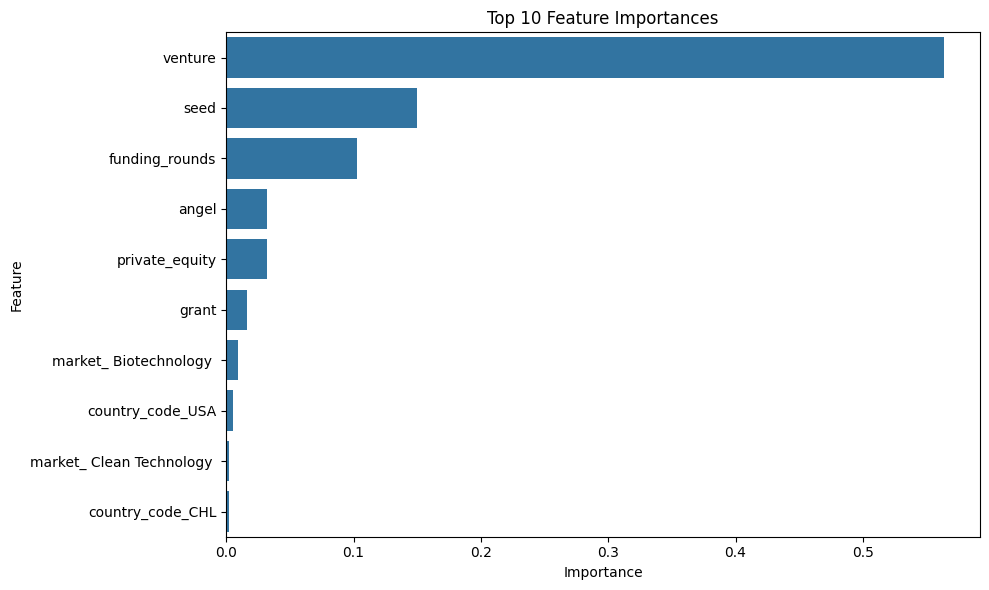

In [26]:
#Get Feature Importance (Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


In [27]:
X_test.head()

,funding_rounds,seed,venture,angel,private_equity,grant,country_code_ARE,country_code_ARG,country_code_ARM,country_code_AUS,...,market_ Wireless,market_ Women,market_ World Domination,market_ Writers,market_ Young Adults,market_ iOS,market_ iPad,market_ iPhone,market_ iPod Touch,market_ mHealth
43693,1.0,0.0,45000000.0,0.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11501,2.0,0.0,13537704.0,0.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26430,1.0,340525.0,0.0,0.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45845,3.0,0.0,30500000.0,0.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29547,1.0,250000.0,0.0,0.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#Export Data for Power BI
df_export = X_test.copy()
df_export['predicted_success'] = y_pred_rf
df_export = df_export.reset_index()
df_export = pd.merge(df[['name', 'funding_total_usd', 'country_code', 'market']], df_export, left_index=True, right_on='index')
df_export.to_csv("startup_predictions.csv", index=False)


In [29]:
from google.colab import files
files.download("startup_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Step 2: Import pandas
import pandas as pd

# Step 3: Define your file path in Drive
csv_path = '/content/drive/My Drive/MY-PROJECT/Global Startup Eco sys DB with Funding & Growth Analysis/startup_predictions.csv'

# Step 4: Read CSV
df = pd.read_csv(csv_path)

# Step 5: Convert to Excel (.xlsx)
excel_path = '/content/converted_file.xlsx'
df.to_excel(excel_path, index=False)

# Step 6: Download the Excel file
from google.colab import files
files.download(excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>